<a href="https://colab.research.google.com/github/lafa-code/MachineLearning/blob/main/Lat_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projek Stroke Detection
1. Sumber data: kaggle
2. Deskripsi data
Ada 10 variabel dan 1 label
3. Flowchart narasi
a. Koneksikan colab ke google drive (tempat dataset) </br>
b. Path dan Baca data </br>
c. Encoding</br>
d. Standarisasi atau normalisasi data</br>
e. Split data</br>
f. evaluasi</br>
g. Modelling</br>
- ID3 </br>
- CART </br>
- Naive Bayes </br>
- SVM </br>
- KNN </br>
- Logistic regression </br>


In [ ]:
""" akses ke google drive"""
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
""" pembacaan data dan visualisasi"""

import pandas as pd

file_path = '/content/drive/MyDrive/Internal-2024/Data_stroke.csv'

df = pd.read_csv(file_path)
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
""" preprocessing data. Cek agar setiap kolom berfungsi sebagai fitur, representasi kategoris.
Misalnya, di sini Pria atau Wanita tidak dapat langsung digunakan sebagai fitur, ubah -proses encoding
Beberapa algoritma tidak bisa menangani kategori secara langsung
 """
# categorical_columns = ['hypertension', 'heart_disease','ever_married','stroke']
# numeric_columns = ['age', 'avg_glucose_level']

# categorical_columns = ['gender', 'hypertension', 'heart_disease','work_type','Residence_type','smoking_status','stroke']
# numeric_columns = ['age', 'avg_glucose_level', 'bmi']

categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type','Residence_type','smoking_status','stroke']
numeric_columns = ['age', 'avg_glucose_level', 'bmi']

# Konversi kolom kategoris ke tipe data kategori
df[categorical_columns] = df[categorical_columns].astype('category')

# encoding kategori ke integer
for col in categorical_columns:
    df[col] = df[col].cat.codes

In [ ]:
""" visual 5 data teratas """

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [ ]:
""" pemisahan kolom label dengan kolom fitur """

features = df.iloc[:, :-1]  # semua kolom kecuali terakhir

labels = df.iloc[:, -1]  # Pilih kolom terakhir

feature_names = features.columns.tolist()

In [ ]:
""" Coba normalisasi.  Z-Score, MinMAx."""

""" Z-Score Normalization """
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_z_array = scaler.fit_transform(features)

# Konversi ke DataFrame agar punya .columns
features_z = pd.DataFrame(features_z_array, columns=feature_names)
features_z.to_csv('/content/drive/MyDrive/Internal-2024/Stroke_z.csv', index=False)

""" Min-Max Normalization """

from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

features_minmax_array = scaler.fit_transform(features)
features_minmax = pd.DataFrame(features_minmax_array, columns=feature_names)
features_minmax.to_csv('/content/drive/MyDrive/Internal-2024/Stroke_minmax.csv', index=False)


""" Hasil dari kedua transformasi telah disimpan sebagai file csv Employee_z dan Employee_minmax di Google Drive"""

' Hasil dari kedua transformasi telah disimpan sebagai file csv Employee_z dan Employee_minmax di Google Drive'

In [ ]:
"""Splitt data menjadi subset train dan test. Sebagai aturan praktis, rasio 80:20 untuk train dan test.
opsi lain Misalnya, 90:10, atau 70:30. """

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_z, labels, test_size=0.2, random_state=42)


In [ ]:
print(features_z)

        gender       age  hypertension  heart_disease  ever_married  \
0     1.183909  1.040584     -0.326186       4.136753      0.720137   
1     1.183909  1.614270     -0.326186       4.136753      0.720137   
2    -0.844660  0.246250     -0.326186      -0.241735      0.720137   
3    -0.844660  1.570141      3.065738      -0.241735      0.720137   
4     1.183909  1.658400     -0.326186      -0.241735      0.720137   
...        ...       ...           ...            ...           ...   
4976  1.183909 -0.106788     -0.326186      -0.241735     -1.388624   
4977  1.183909 -0.150917     -0.326186      -0.241735      0.720137   
4978 -0.844660  0.069731      3.065738      -0.241735      0.720137   
4979  1.183909 -0.150917     -0.326186      -0.241735      0.720137   
4980 -0.844660  1.614270      3.065738      -0.241735      0.720137   

      work_type  Residence_type  avg_glucose_level       bmi  smoking_status  
0     -0.351534        0.983473           2.723411  1.193238       -

In [ ]:
# Membuat fungsi evaluasi model dan confusion matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

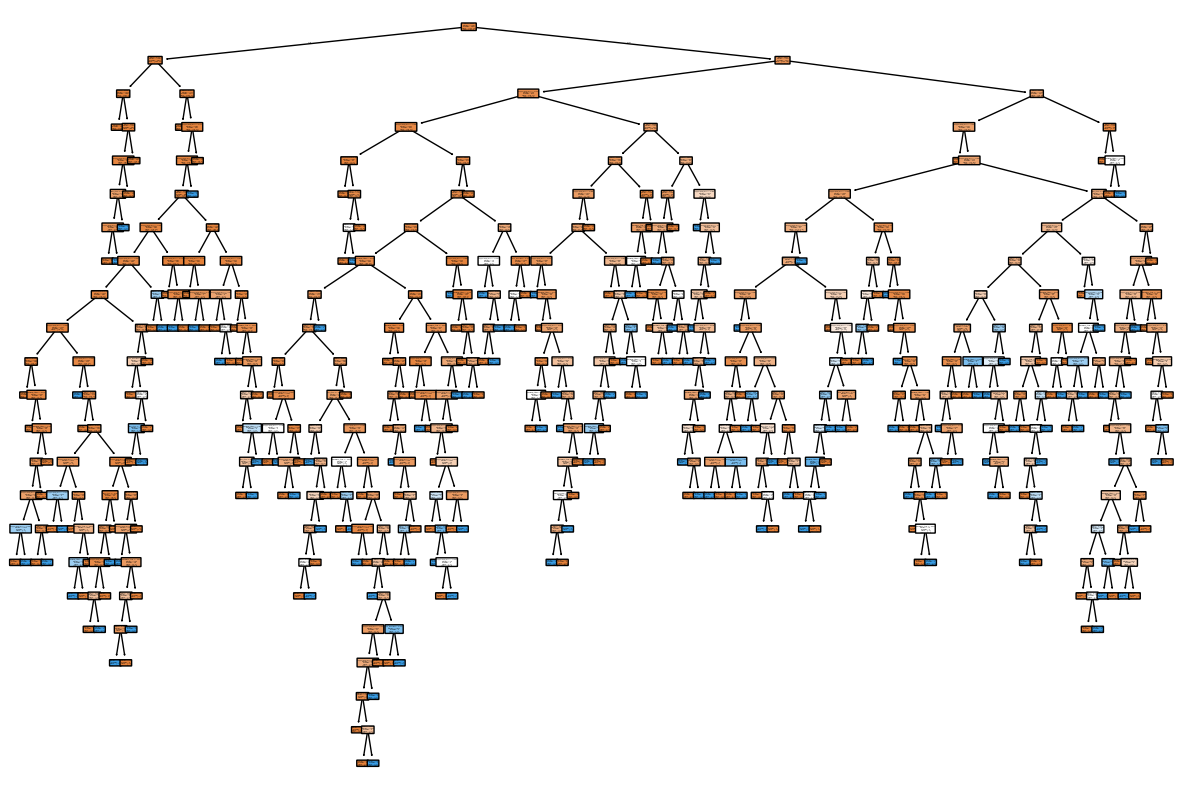

Accuracy: 0.91
Precision: 0.90
Recall: 0.91
F1 Score: 0.91


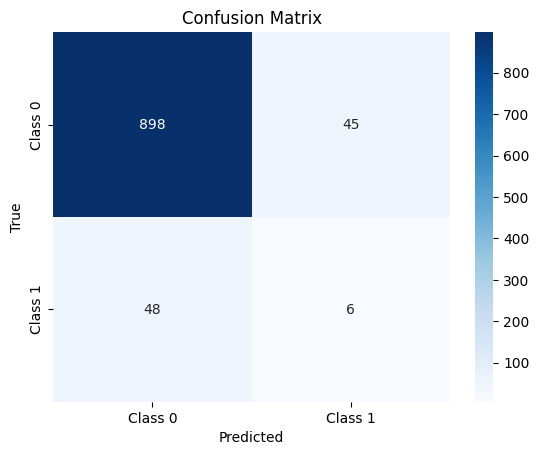

In [ ]:
""" Modeling- DecisionTreeClassifier"""

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# ID3 Decision Tree Classifier
id3_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model on the training data
id3_classifier.fit(X_train, y_train)


# Visualisasi pohon keputusan
plt.figure(figsize=(15, 10))
plot_tree(id3_classifier, feature_names=feature_names, class_names=["Class 0", "Class 1"], filled=True, rounded=True)
plt.show()


# Make predictions on the test data
y_pred = id3_classifier.predict(X_test)

# Evaluate the model's accuracy on the test data
evaluate_model(y_test, y_pred)

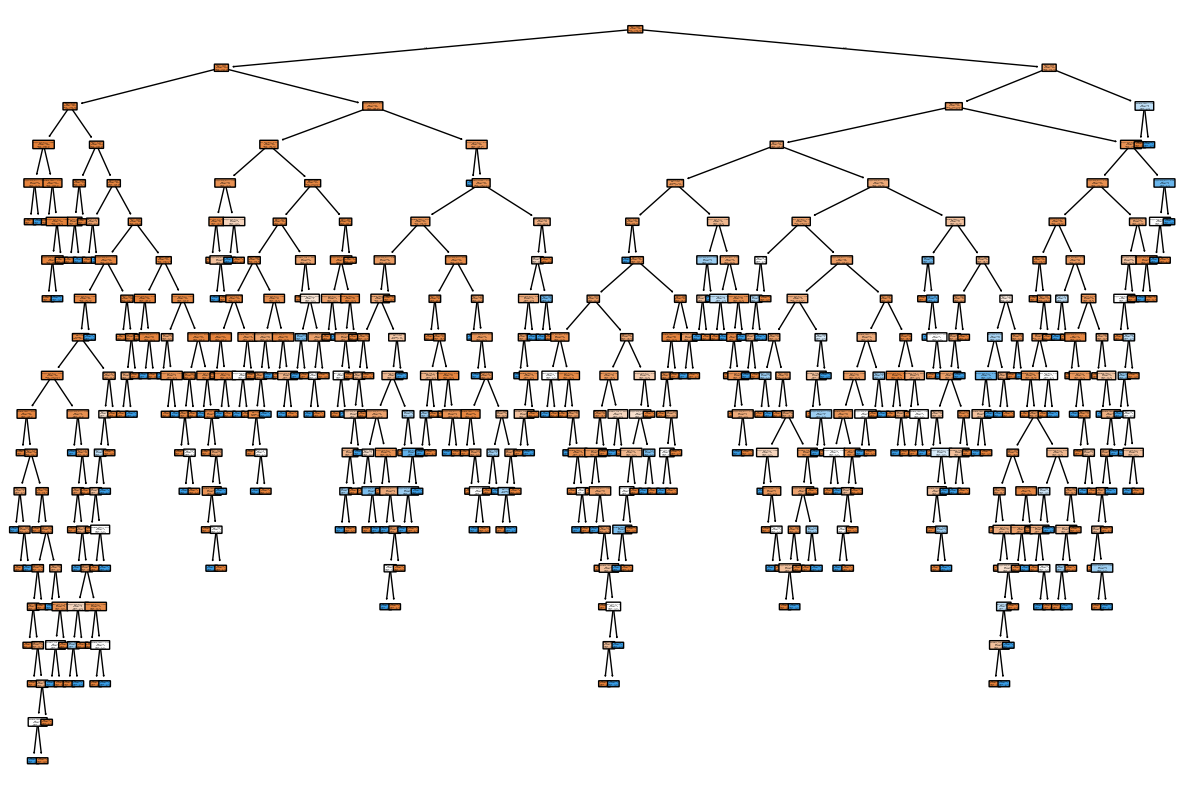

Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


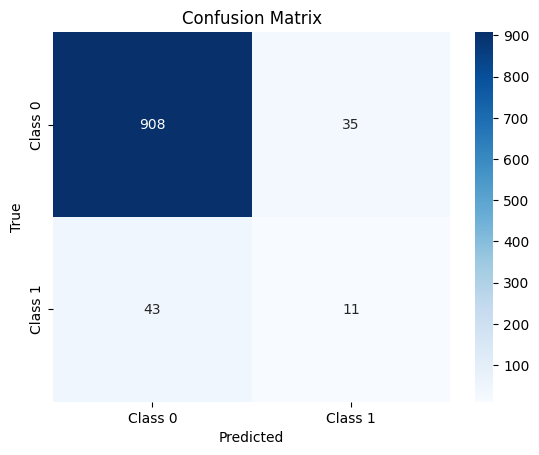

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# CART (C4.5-like) Decision Tree Classifier
c45_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model on the training data
c45_classifier.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(c45_classifier, feature_names=X_train.columns, class_names=["Class 0", "Class 1"], filled=True, rounded=True)
plt.show()

# Make predictions on the test data
y_pred = c45_classifier.predict(X_test)

# Evaluate the model's accuracy on the test data
evaluate_model(y_test, y_pred)

Accuracy: 0.86
Precision: 0.93
Recall: 0.86
F1 Score: 0.89


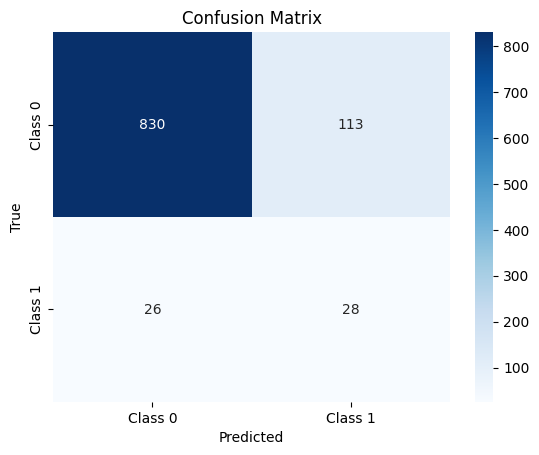

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# a Naive Bayes model (Gaussian Naive Bayes for continuous features)
naive_bayes = GaussianNB()

# Train the model on the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes.predict(X_test)

# Calculate the accuracy of the model
evaluate_model(y_test, y_pred)

Accuracy: 0.95
Precision: 0.89
Recall: 0.95
F1 Score: 0.92


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


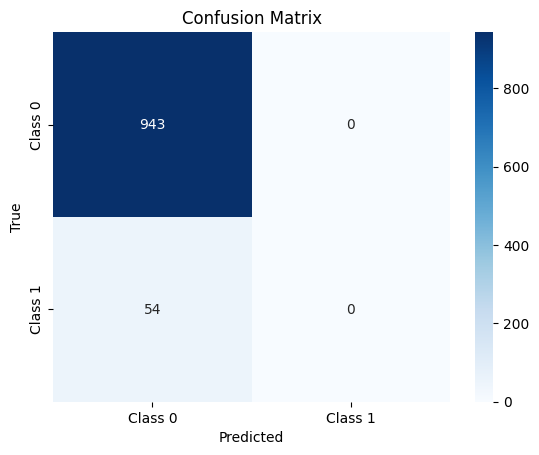

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVM model
svm = SVC(kernel='linear', C=1)

# Train the model on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate the accuracy of the model
evaluate_model(y_test, y_pred)

Accuracy: 0.93
Precision: 0.89
Recall: 0.93
F1 Score: 0.91


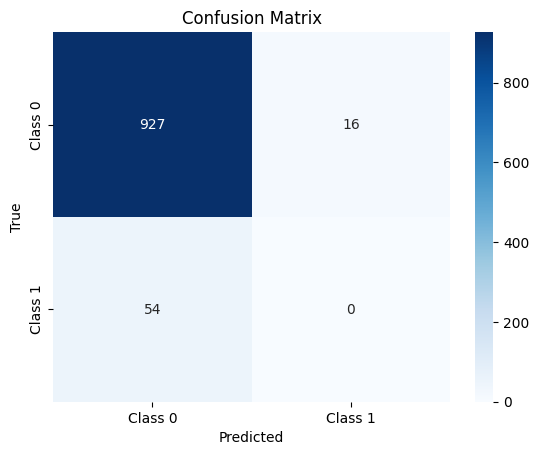

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# KNN model with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
evaluate_model(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.95
Precision: 0.89
Recall: 0.95
F1 Score: 0.92


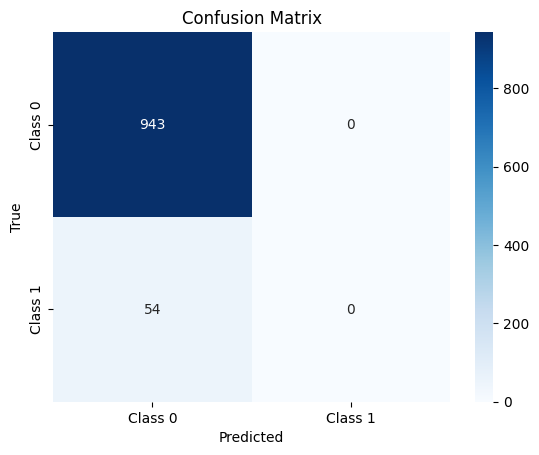

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression model
logistic_regression = LogisticRegression()

# Train the model on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

# Calculate the accuracy of the model
evaluate_model(y_test, y_pred)